# 20160930 - SQQQ BEAR CREDIT SPREAD

In [1]:
import sys
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\options\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PlotSignal\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PrintPlot\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PlotSignal\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\Options\src')
trade_data_path = r'E:\Datos\jupyter notebooks\trading\data\\'
from PlotSignal.Csv_mngt import Csv_mngt
from  PlotSignal.PrintPlot import PrintPlot
from PlotSignal.PrintTrading import PrintTrading
import numpy as np
import mpld3
from datetime import datetime
from matplotlib.dates import  date2num
from Options.Value import Calculate
%matplotlib inline
mpld3.enable_notebook()

## ENTRY

### BUY LEG 

#### ENTRY DATA BUY LEG

In [2]:
###################################################################################################################
csv_file = '20160930 SQQQ.csv'
###################################################################################################################

data_csv = Csv_mngt()
data_csv.set_data(trade_data_path + csv_file,';')

option_buy = data_csv.extract_data_row('FIELD','option_buy','VALUE')
print('option_buy = ' + option_buy)
option_path_buy=data_csv.extract_data_row('FIELD','option_path_buy','VALUE')
print('option_path_buy = ' + option_path_buy)
option_type = data_csv.extract_data_row('FIELD','option_type','VALUE')
print('option_type = ' + option_type)
strike_buy = float(data_csv.extract_data_row('FIELD','strike_buy','VALUE').replace(',','.'))
print('strike_buy = ' + str(strike_buy))
expiration = datetime(int(data_csv.extract_data_row('FIELD','expiration_yy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','expiration_mm','VALUE')),
                      int(data_csv.extract_data_row('FIELD','expiration_dd','VALUE')), 16, 0, 0)
print('expiration = ' + str(expiration))
premium_buy = float(data_csv.extract_data_row('FIELD','premium_buy','VALUE').replace(',','.'))
print('premium_buy = ' + str(premium_buy))
try:
    underlying_buy = float(data_csv.extract_data_row('FIELD','underlying_buy','VALUE').replace(',','.'))
except ValueError:
    underlying_buy = 0
print('underlying_buy = ' + str(underlying_buy))
entry_date_buy = datetime(int(data_csv.extract_data_row('FIELD','entry_date_buy_yy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_buy_mm','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_buy_dd','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_buy_HH','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_buy_MM','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_buy_SS','VALUE')))
print('entry_date_buy = ' + str(entry_date_buy))
trading_day_buy = entry_date_buy.date()
print('trading_day_buy = ' + str(trading_day_buy))
ticker = data_csv.extract_data_row('FIELD','ticker','VALUE')
print('ticker = ' + str(ticker))
historical_volatility_buy = float(data_csv.extract_data_row('FIELD','historical_volatility_buy','VALUE').replace(',','.'))
print('historical_volatility_buy = ' + str(historical_volatility_buy))

option_buy = 20160930 +SQQQ-161021C15.00
option_path_buy = E:\\Datos\\bolsa\\cuenta personal\\analisis de valores\\Trades activos\\Scanning\\20160930
option_type = call
strike_buy = 15.0
expiration = 2016-10-21 16:00:00
premium_buy = 0.25
underlying_buy = 13.305
entry_date_buy = 2016-09-30 12:56:08
trading_day_buy = 2016-09-30
ticker = SQQQ
historical_volatility_buy = 0.4376


In [3]:
# get data
csv = Csv_mngt()
csv.set_data(option_path_buy + '\\Opciones\\' + option_buy + '.txt',';')
# clean up of the csv deleting rows with no time entry
time_list=csv.extract_data_col('Time')
for each in time_list:
    try:
        time_conversion=datetime.strptime(each, '%H:%M:%S')
    except ValueError:
        csv.delete_data_row('Time',each)
time_list=csv.extract_data_col('Time')
bid_str = csv.extract_data_col('Bid Underlier')
for i, each in enumerate(bid_str):
    try:
        bid_str[i]=float(each.replace(',','.'))
    except ValueError:
        if i:
            bid_str[i] = bid_str[i-1]
        else:
            bid_str[i] = 0
    finally:
        if bid_str[i] == 0 and i > 0:
            bid_str[i] = bid_str[i-1]
bid_list = np.asarray(bid_str)
ask_str = csv.extract_data_col('Ask Underlier')
for i, each in enumerate(ask_str):
    try:
        ask_str[i]=float(each.replace(',','.'))
    except ValueError:
        if i:
            ask_str[i] = ask_str[i-1]
        else:
            ask_str[i] = 0
    finally:
        if ask_str[i] == 0 and i > 0:
            ask_str[i] = ask_str[i-1]
ask_list = np.asarray(ask_str)
target_str = csv.extract_data_col('Target')
clean_target_str = []
for each in target_str:
    try:
        clean_target_str.append(float(each.replace(',','.')))
    except ValueError:
        clean_target_str.append(0)
target_list = np.asarray(clean_target_str)
time_list = csv.date2num_list(time_list, '%H:%M:%S')-0.25
time_list = time_list - int(time_list[0]) + date2num(trading_day_buy)
under_price = (bid_list + ask_list) / 2
premium_bid_str = csv.extract_data_col('Bid')
premium_bid = np.asarray([float(x.replace(',','.')) for x in premium_bid_str])
premium_ask_str = csv.extract_data_col('Ask')
premium_ask = np.asarray([float(x.replace(',','.')) for x in premium_ask_str])
for i,v in enumerate(time_list):
    if date2num(entry_date_buy) <= v:
        break
if not i:
    i=1
ask_price_buy = premium_ask[i-1]
print(ask_price_buy)

0.3


#### UNDERLYING BUY LEG

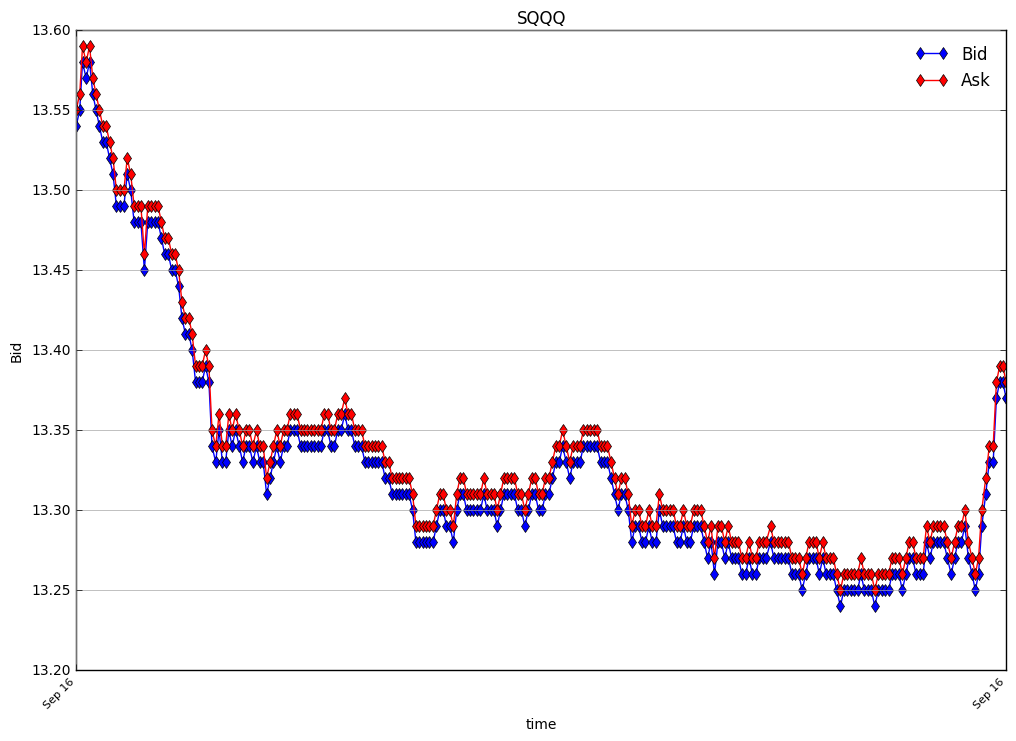

entry_date_buy = 2016-09-30 12:56:08


In [4]:

graph = PrintPlot(time_list, bid_list)
graph.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph.append_trace(ask_list, 'rd-', 'Ask')
graph.show()
print('entry_date_buy = ' + str(entry_date_buy))

#### TRADING BUY LEG

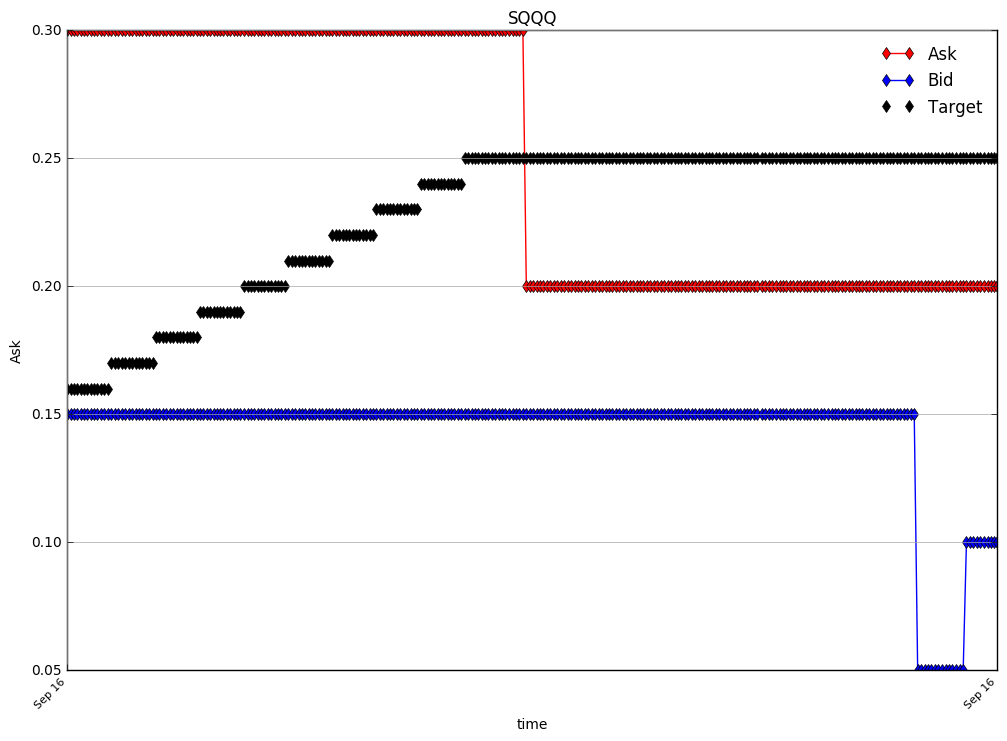

entry_date_buy = 2016-09-30 12:56:08
premium_buy = 0.25


In [5]:
graph_trading_buy = PrintPlot(time_list, premium_ask)
graph_trading_buy.init_plot(trace_type = 'rd-', data_name = 'Ask', x_name = 'time', fig_size = (12, 8),
                            title_plot = ticker, log_y = False)
graph_trading_buy.append_trace(premium_bid, 'bd-', 'Bid')
graph_trading_buy.append_trace(target_list, 'kd', 'Target')
graph_trading_buy.show()
print('entry_date_buy = ' + str(entry_date_buy))
print('premium_buy = ' + str(premium_buy))

#### IMPLIED VOLATILITY BUY LEG

(736237.5389814815, 0.61299999999999999)


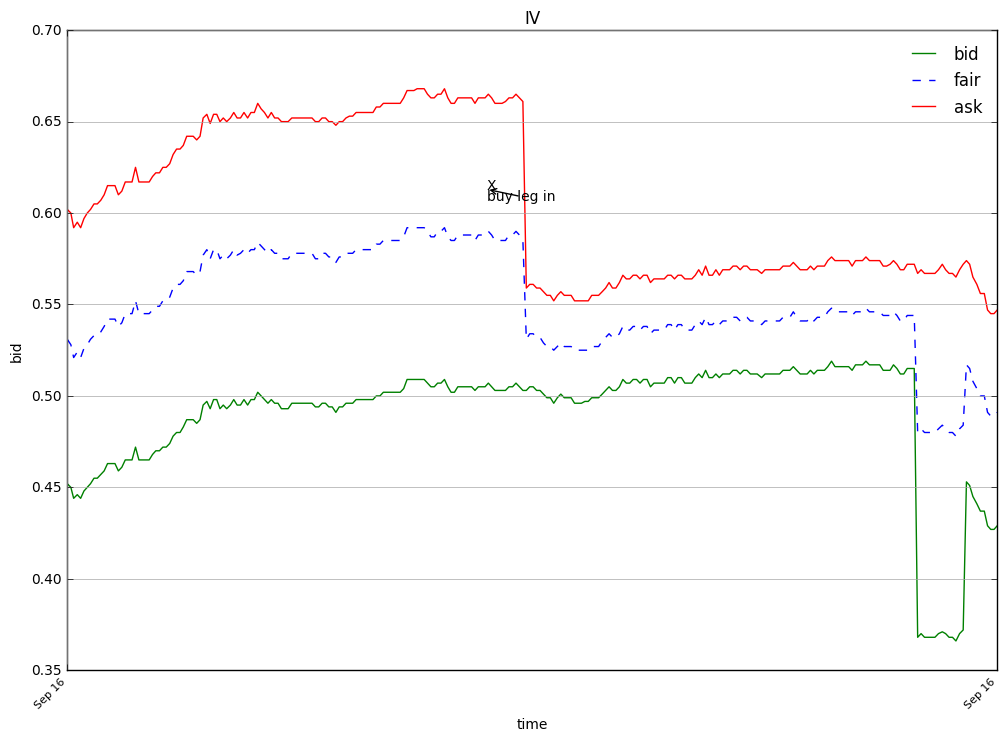

entry_date_buy = 2016-09-30 12:56:08


In [6]:
# buy leg implied volatility
graph_IV_buy = PrintTrading()
graph_IV_buy.print_IV(option_type, premium_bid, under_price, strike_buy, time_list, expiration, data_name = 'bid',
                     trace_type = 'g-')
time_leg_IV_in = date2num(entry_date_buy)
time_to_exp = date2num(expiration)-date2num(entry_date_buy)
buy_leg_IV_in = Calculate().find_IV(option_type, premium_buy, underlying_buy, strike_buy, time_to_exp)
xy = (date2num(entry_date_buy), buy_leg_IV_in)
print(xy)
xy_text = (date2num(entry_date_buy), buy_leg_IV_in * 0.99)

graph_IV_buy.annotate('buy leg in', xy, xy_text)
graph_IV_buy.text('X', date2num(entry_date_buy), buy_leg_IV_in)
premium_trade = (premium_bid + premium_ask) / 2
graph_IV_buy.add_IV(option_type, premium_trade, under_price, strike_buy, time_list, expiration, data_name = 'fair',
                     trace_type = 'b--')
graph_IV_buy.add_IV(option_type, premium_ask, under_price, strike_buy, time_list, expiration, data_name = 'ask',
                     trace_type = 'r-')
graph_IV_buy.show()
print('entry_date_buy = ' + str(entry_date_buy))

#### IMPLIED VOLATILITY CALCULATED BUY LEG

In [7]:
# Buy_leg, IV
print('IV of buy leg in = ' + str(buy_leg_IV_in) + '    premium buy leg = ' + str(premium_buy))
print('\nPremium market buy = ' + '{0:.2f}'.format(ask_price_buy))
try:
    premium_historical_buy = Calculate().value(option_type, underlying_buy, strike_buy, date2num(expiration) - 
                                           date2num(entry_date_buy), historical_volatility_buy, 0.01, 0)
except ZeroDivisionError:
    premium_historical_buy = 0
print('\nHistorical volatility buy = ' + str(historical_volatility_buy) +
      '    premium HV buy = ' + '{0:.2f}'.format(premium_historical_buy))

IV of buy leg in = 0.613    premium buy leg = 0.25

Premium market buy = 0.30

Historical volatility buy = 0.4376    premium HV buy = 0.10


#### RESULTS ENTRY BUY LEG

##### ROBOT TRADING

In [8]:
print('IV of buy leg in = ' + str(buy_leg_IV_in) + '    premium buy leg = ' + str(premium_buy))
premium_robot_entry = - premium_buy  # my profit at the entry
print('\n premium robot entry = ' + '{0:.2f}'.format(premium_robot_entry))
robot_profit = premium_robot_entry
print('\n robot profit = ' + '{0:.2f}'.format(robot_profit))

IV of buy leg in = 0.613    premium buy leg = 0.25

 premium robot entry = -0.25

 robot profit = -0.25


##### MARKET TRADING

In [9]:
print('Premium market buy = ' + '{0:.2f}'.format(ask_price_buy))
premium_market_entry = - ask_price_buy
print('\n premium market entry = ' + '{0:.2f}'.format(premium_market_entry))
market_profit = premium_market_entry
print('\n trading at market prices profit = ' + '{0:.2f}'.format(market_profit))
if market_profit < robot_profit:
    improvement = abs(robot_profit-market_profit)/abs(market_profit)
    print('\n\n\nROBOT HAS GOT BETTER RESULTS THAN MARKET PRICES = ' + '{0:.2%}'.format(improvement))
elif market_profit == robot_profit:
    print('\n\n\nROBOT HAS NOT IMPROVED MARKET TRADING')
else:    
    improvement = abs(robot_profit-market_profit)/abs(market_profit)
    print('\n\n\nROBOT HAS GOT WORSE RESULTS = ' + '{0:.2%}'.format(improvement))
print('\n   robot profit = ' + '{0:.2f}'.format(robot_profit))
print('\n   trading at market prices profit = ' + '{0:.2f}'.format(market_profit))

Premium market buy = 0.30

 premium market entry = -0.30

 trading at market prices profit = -0.30



ROBOT HAS GOT BETTER RESULTS THAN MARKET PRICES = 16.67%

   robot profit = -0.25

   trading at market prices profit = -0.30


##### TRADING AT HISTORICAL VOLATILITY

In [10]:
print('Premium historical buy = ' + '{0:.2f}'.format(premium_historical_buy))
premium_historical_entry = - premium_historical_buy  # my profit at the entry
print('\n premium historical entry = ' + '{0:.2f}'.format(premium_historical_entry))
historical_profit = premium_historical_entry
print('\n trading at historical volatility prices profit = ' + '{0:.2f}'.format(historical_profit))
if historical_profit < robot_profit:
    improvement = abs(robot_profit-historical_profit)/abs(historical_profit)
    print('\n\n\nROBOT HAS GOT BETTER RESULTS THAN HISTORICAL VOLATILITY PRICES = ' + '{0:.2%}'.format(improvement))
elif historical_profit == robot_profit:
    print('\n\n\nROBOT HAS NOT IMPROVED MARKET TRADING RESPECT TO HISTORICAL VOLATILITY PRICES')
else:    
    improvement = abs(robot_profit-historical_profit)/abs(historical_profit)
    print('\n\n\nROBOT HAS GOT WORSE RESULTS THAN HISTORICAL VOLATILITY PRICES = ' + '{0:.2%}'.format(improvement))
print('\n   robot profit = ' + '{0:.2f}'.format(robot_profit))
print('\n   trading at historical volatility prices profit = ' + '{0:.2f}'.format(historical_profit))

Premium historical buy = 0.10

 premium historical entry = -0.10

 trading at historical volatility prices profit = -0.10



ROBOT HAS GOT WORSE RESULTS THAN HISTORICAL VOLATILITY PRICES = 156.26%

   robot profit = -0.25

   trading at historical volatility prices profit = -0.10


### WRITE LEG

   #### ENTRY DATA WRITE LEG

In [11]:
data_csv = Csv_mngt()
data_csv.set_data(trade_data_path + csv_file,';')

option_write = data_csv.extract_data_row('FIELD','option_write','VALUE')
print('option_write = ' + option_write)
option_path_write=data_csv.extract_data_row('FIELD','option_path_write','VALUE')
print('option_path_write = ' + option_path_write)
strike_write = float(data_csv.extract_data_row('FIELD','strike_write','VALUE').replace(',','.'))
print('strike_write = ' + str(strike_write))
premium_write = float(data_csv.extract_data_row('FIELD','premium_write','VALUE').replace(',','.'))
print('premium_write = ' + str(premium_write))
try:
    underlying_write = float(data_csv.extract_data_row('FIELD','underlying_write','VALUE').replace(',','.'))
except ValueError:
    underlying_write = 0
print('underlying_write = ' + str(underlying_write))
entry_date_write = datetime(int(data_csv.extract_data_row('FIELD','entry_date_write_yy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_write_mm','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_write_dd','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_write_HH','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_write_MM','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_write_SS','VALUE')))
print('entry_date_write = ' + str(entry_date_write))
trading_day_write = entry_date_write.date()
print('trading_day_write = ' + str(trading_day_write))
historical_volatility_write = float(data_csv.extract_data_row('FIELD','historical_volatility_write','VALUE').replace(',','.'))
print('historical_volatility_write = ' + str(historical_volatility_write))

option_write = 20161004 +SQQQ-161021C14.00
option_path_write = E:\\Datos\\bolsa\\cuenta personal\\analisis de valores\\Trades activos\\Scanning\\20161004
strike_write = 14.0
premium_write = -0.25
underlying_write = 13.425
entry_date_write = 2016-10-04 12:59:34
trading_day_write = 2016-10-04
historical_volatility_write = 0.4418


In [12]:
# get data
csv = Csv_mngt()
csv.set_data(option_path_write + '\\Opciones\\' + option_write + '.txt',';')
# clean up of the csv deleting rows with no time entry
time_list=csv.extract_data_col('Time')
for each in time_list:
    try:
        time_conversion=datetime.strptime(each, '%H:%M:%S')
    except ValueError:
        csv.delete_data_row('Time',each)
time_list=csv.extract_data_col('Time')
bid_str = csv.extract_data_col('Bid Underlier')
for i, each in enumerate(bid_str):
    try:
        bid_str[i]=float(each.replace(',','.'))
    except ValueError:
        if i:
            bid_str[i] = bid_str[i-1]
        else:
            bid_str[i] = 0
    finally:
        if bid_str[i] == 0 and i > 0:
            bid_str[i] = bid_str[i-1]
bid_list = np.asarray(bid_str)
ask_str = csv.extract_data_col('Ask Underlier')
for i, each in enumerate(ask_str):
    try:
        ask_str[i]=float(each.replace(',','.'))
    except ValueError:
        if i:
            ask_str[i] = ask_str[i-1]
        else:
            ask_str[i] = 0
    finally:
        if ask_str[i] == 0 and i > 0:
            ask_str[i] = ask_str[i-1]
ask_list = np.asarray(ask_str)
target_str = csv.extract_data_col('Target')
clean_target_str = []
for each in target_str:
    try:
        clean_target_str.append(float(each.replace(',','.')))
    except ValueError:
        clean_target_str.append(0)
target_list = np.asarray(clean_target_str)
time_list = csv.date2num_list(time_list, '%H:%M:%S')-0.25
time_list = time_list - int(time_list[0]) + date2num(trading_day_buy)
under_price = (bid_list + ask_list) / 2
premium_bid_str = csv.extract_data_col('Bid')
premium_bid = np.asarray([float(x.replace(',','.')) for x in premium_bid_str])
premium_ask_str = csv.extract_data_col('Ask')
premium_ask = np.asarray([float(x.replace(',','.')) for x in premium_ask_str])
for i,v in enumerate(time_list):
    if date2num(entry_date_write) <= v:
        break
if not i:
    i=1
bid_price_write = premium_bid[i-1]
print(bid_price_write)

0.3


#### UNDERLYING WRITE LEG

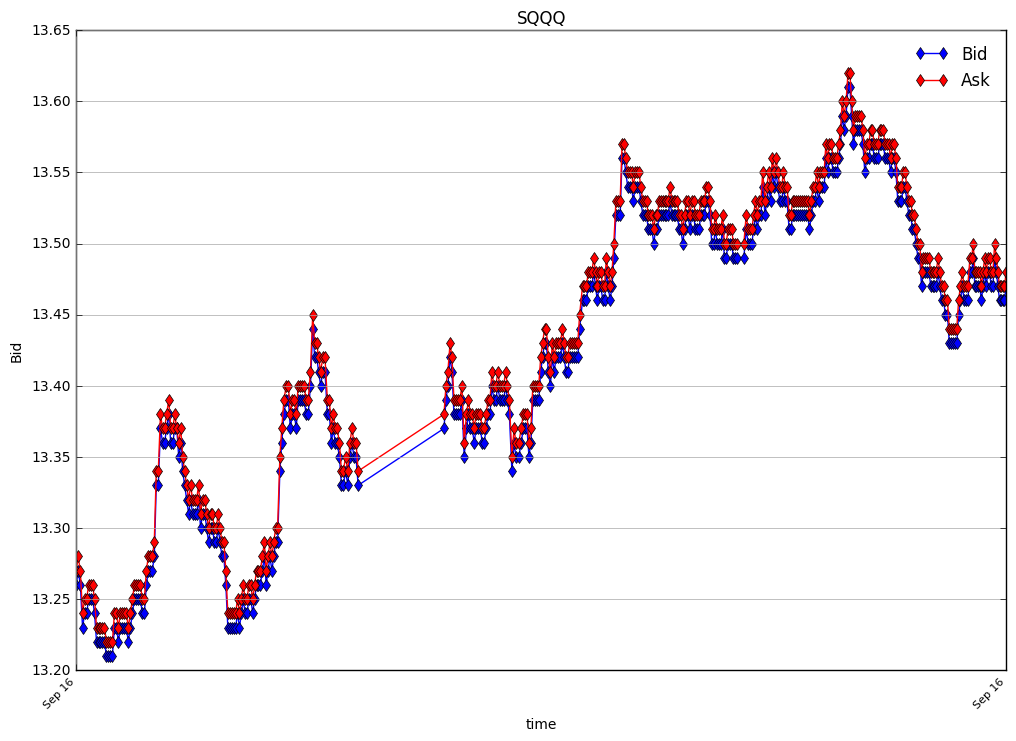

entry_date_write = 2016-10-04 12:59:34


In [13]:
graph = PrintPlot(time_list, bid_list)
graph.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph.append_trace(ask_list, 'rd-', 'Ask')
graph.show()
print('entry_date_write = ' + str(entry_date_write))

#### TRADING WRITE LEG

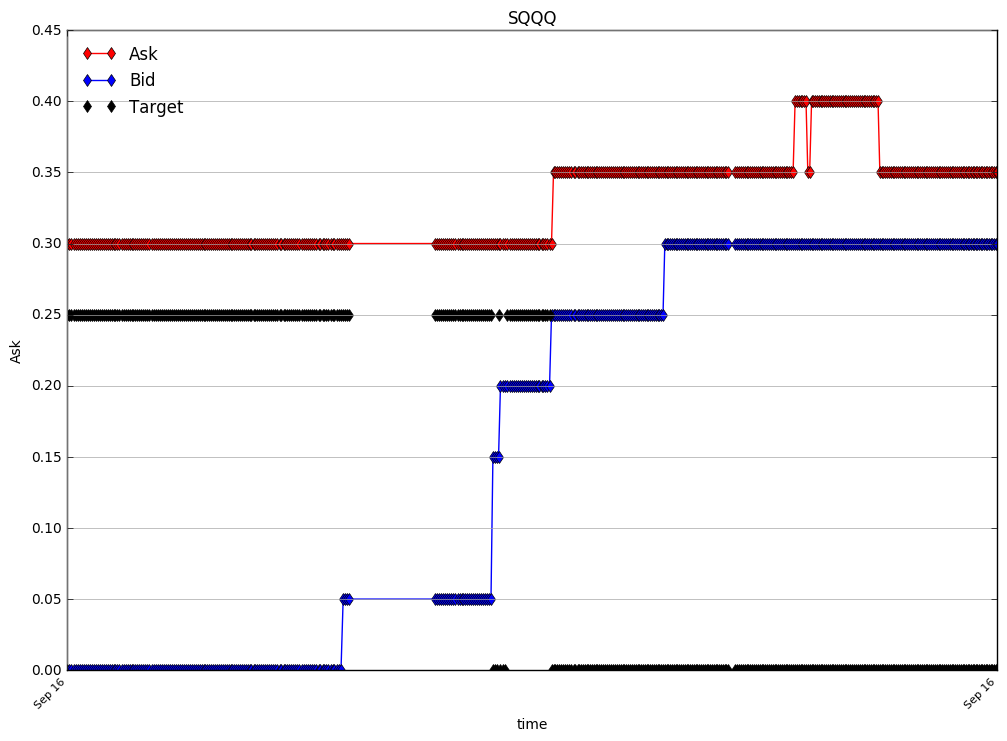

entry_date_buy = 2016-09-30 12:56:08
premium_buy = 0.25


In [14]:
graph_trading_buy = PrintPlot(time_list, premium_ask)
graph_trading_buy.init_plot(trace_type = 'rd-', data_name = 'Ask', x_name = 'time', fig_size = (12, 8),
                            title_plot = ticker, log_y = False)
graph_trading_buy.append_trace(premium_bid, 'bd-', 'Bid')
graph_trading_buy.append_trace(target_list, 'kd', 'Target')
graph_trading_buy.show()
print('entry_date_buy = ' + str(entry_date_buy))
print('premium_buy = ' + str(premium_buy))

#### IMPLIED VOLATILITY WRITE LEG

In [15]:
# buy leg implied volatility
graph_IV_write = PrintTrading()
graph_IV_write.print_IV(option_type, premium_ask, under_price, strike_write, time_list, expiration, data_name = 'ask',
                     trace_type = 'g-')
time_leg_IV_in = date2num(entry_date_write)
time_to_exp = date2num(expiration)-date2num(entry_date_write)
write_leg_IV_in = Calculate().find_IV(option_type, -premium_write, underlying_write, strike_write, time_to_exp)
xy = (date2num(entry_date_write), write_leg_IV_in)
xy_text = (date2num(entry_date_write), write_leg_IV_in * 0.99)
graph_IV_write.annotate('write leg in', xy, xy_text)
graph_IV_write.text('X', date2num(entry_date_write), write_leg_IV_in)
premium_trade = (premium_bid + premium_ask) / 2
graph_IV_buy.add_IV(option_type, premium_trade, under_price, strike_write, time_list, expiration, data_name = 'fair',
                     trace_type = 'b--')
graph_IV_buy.add_IV(option_type, premium_bid, under_price, strike_write, time_list, expiration, data_name = 'bid',
                     trace_type = 'r-')
graph_IV_write.show()
print('entry_date_write = ' + str(entry_date_write))

ValueError: Image size of 736339x763 pixels is too large. It must be less than 2^16 in each direction.

entry_date_write = 2016-10-04 12:59:34


#### IMPLIED VOLATILITY CALCULATED

In [16]:
# Write_leg, IV
print('IV of write leg in = ' + str(write_leg_IV_in) + '    premium write leg = ' + str(premium_write))
print('\nPremium market write = ' + '{0:.2f}'.format(bid_price_write))
try:
    premium_historical_write = Calculate().value(option_type, underlying_write, strike_write, date2num(expiration) - 
                                           date2num(entry_date_write), historical_volatility_write, 0.01, 0)
except ZeroDivisionError:
    premium_historical_write = 0
print('\nHistorical volatility write = ' + str(historical_volatility_write) +
      '    premium HV write = ' + '{0:.2f}'.format(premium_historical_write))


IV of write leg in = 0.405    premium write leg = -0.25

Premium market write = 0.30

Historical volatility write = 0.4418    premium HV write = 0.29


#### RESULTS ENTRY WRITE LEG

##### ROBOT TRADING

In [17]:
print('IV of buy leg in = ' + str(buy_leg_IV_in) + '    premium buy leg = ' + str(premium_buy))
print('IV of write leg in = ' + str(write_leg_IV_in) + '    premium write leg = ' + str(premium_write))
premium_robot_entry = (-premium_write) - premium_buy  # my profit at the entry
print('\n premium robot entry = ' + '{0:.2f}'.format(premium_robot_entry))
robot_profit = premium_robot_entry 
print('\n robot profit = ' + '{0:.2f}'.format(robot_profit))

IV of buy leg in = 0.613    premium buy leg = 0.25
IV of write leg in = 0.405    premium write leg = -0.25

 premium robot entry = 0.00

 robot profit = 0.00


##### MARKET TRADING

In [18]:
print('Premium market buy = ' + '{0:.2f}'.format(ask_price_buy))
print('Premium market write = ' + '{0:.2f}'.format(bid_price_write))
premium_market_entry = bid_price_write - ask_price_buy
print('\n premium market entry = ' + '{0:.2f}'.format(premium_market_entry))
market_profit = premium_market_entry
print('\n trading at market prices profit = ' + '{0:.2f}'.format(market_profit))
if market_profit < robot_profit:
    improvement = abs(robot_profit-market_profit)/abs(market_profit)
    print('\n\n\nROBOT HAS GOT BETTER RESULTS THAN MARKET PRICES = ' + '{0:.2%}'.format(improvement))
elif market_profit == robot_profit:
    print('\n\n\nROBOT HAS NOT IMPROVED MARKET TRADING')
else:    
    improvement = abs(robot_profit-market_profit)/abs(market_profit)
    print('\n\n\nROBOT HAS GOT WORSE RESULTS = ' + '{0:.2%}'.format(improvement))
print('\n   robot profit = ' + '{0:.2f}'.format(robot_profit))
print('\n   trading at market prices profit = ' + '{0:.2f}'.format(market_profit))

Premium market buy = 0.30
Premium market write = 0.30

 premium market entry = 0.00

 trading at market prices profit = 0.00



ROBOT HAS NOT IMPROVED MARKET TRADING

   robot profit = 0.00

   trading at market prices profit = 0.00


##### TRADING AT HISTORICAL VOLATILITY

In [19]:
print('Premium historical buy = ' + '{0:.2f}'.format(premium_historical_buy))
print('Premium historical write = ' + '{0:.2f}'.format(premium_historical_write))
premium_historical_entry = - premium_historical_buy + premium_historical_write # my profit at the entry
print('\n premium historical entry = ' + '{0:.2f}'.format(premium_historical_entry))
historical_profit = premium_historical_entry
print('\n trading at historical volatility prices profit = ' + '{0:.2f}'.format(historical_profit))
if historical_profit < robot_profit:
    improvement = abs(robot_profit-historical_profit)/abs(historical_profit)
    print('\n\n\nROBOT HAS GOT BETTER RESULTS THAN HISTORICAL VOLATILITY PRICES = ' + '{0:.2%}'.format(improvement))
elif historical_profit == robot_profit:
    print('\n\n\nROBOT HAS NOT IMPROVED MARKET TRADING RESPECT TO HISTORICAL VOLATILITY PRICES')
else:    
    improvement = abs(robot_profit-historical_profit)/abs(historical_profit)
    print('\n\n\nROBOT HAS GOT WORSE RESULTS THAN HISTORICAL VOLATILITY PRICES = ' + '{0:.2%}'.format(improvement))
print('\n   robot profit = ' + '{0:.2f}'.format(robot_profit))
print('\n   trading at historical volatility prices profit = ' + '{0:.2f}'.format(historical_profit))

Premium historical buy = 0.10
Premium historical write = 0.29

 premium historical entry = 0.19

 trading at historical volatility prices profit = 0.19



ROBOT HAS GOT WORSE RESULTS THAN HISTORICAL VOLATILITY PRICES = 100.00%

   robot profit = 0.00

   trading at historical volatility prices profit = 0.19


## EXIT

### BUY LEG
#### EXIT DATA BUY LEG

In [20]:
option_buy_exit = data_csv.extract_data_row('FIELD','option_buy_exit','VALUE')
print('option_buy_exit = ' + option_buy_exit)
option_path_buy_exit = data_csv.extract_data_row('FIELD','option_path_buy_exit','VALUE')
print('option_path_buy_exit = ' + option_path_buy_exit)
premium_buy_exit = float(data_csv.extract_data_row('FIELD','premium_buy_exit','VALUE').replace(',','.'))
print('premium_buy_exit = ' + str(premium_buy_exit))
try:
    underlying_buy_exit = float(data_csv.extract_data_row('FIELD','underlying_buy_exit','VALUE').replace(',','.'))
except ValueError:
    underlying_buy_exit = 0
print('underlying_buy_exit = ' + str(underlying_buy_exit))
entry_date_buy_exit = datetime(int(data_csv.extract_data_row('FIELD','exit_date_buy_yy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_buy_mm','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_buy_dd','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_buy_HH','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_buy_MM','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_buy_SS','VALUE')))
print('entry_date_buy_exit = ' + str(entry_date_buy_exit))
trading_day_buy_exit = entry_date_buy_exit.date()
print('trading_day_buy_exit = ' + str(trading_day_buy_exit))
historical_volatility_buy_exit = float(data_csv.extract_data_row('FIELD',
                                                                 'historical_volatility_buy_exit','VALUE').replace(',','.'))
print('historical_volatility_buy_exit = ' + str(historical_volatility_buy_exit))

option_buy_exit = 
option_path_buy_exit = 


ValueError: could not convert string to float: 

In [ ]:
# get data
csv = Csv_mngt()
csv.set_data(option_path_buy_exit + '\\Opciones\\' + option_buy_exit + '.txt',';')
# clean up of the csv deleting rows with no time entry
time_list=csv.extract_data_col('Time')
for each in time_list:
    try:
        time_conversion=datetime.strptime(each, '%H:%M:%S')
    except ValueError:
        csv.delete_data_row('Time',each)
time_list=csv.extract_data_col('Time')
bid_str = csv.extract_data_col('Bid Underlier')
for i, each in enumerate(bid_str):
    try:
        bid_str[i]=float(each.replace(',','.'))
    except ValueError:
        if i:
            bid_str[i] = bid_str[i-1]
        else:
            bid_str[i] = 0
    finally:
        if bid_str[i] == 0 and i > 0:
            bid_str[i] = bid_str[i-1]
bid_list = np.asarray(bid_str)
ask_str = csv.extract_data_col('Ask Underlier')
for i, each in enumerate(ask_str):
    try:
        ask_str[i]=float(each.replace(',','.'))
    except ValueError:
        if i:
            ask_str[i] = ask_str[i-1]
        else:
            ask_str[i] = 0
    finally:
        if ask_str[i] == 0 and i > 0:
            ask_str[i] = ask_str[i-1]
ask_list = np.asarray(ask_str)
target_str = csv.extract_data_col('Target')
clean_target_str = []
for each in target_str:
    try:
        clean_target_str.append(float(each.replace(',','.')))
    except ValueError:
        clean_target_str.append(0)
target_list = np.asarray(clean_target_str)
time_list = csv.date2num_list(time_list, '%H:%M:%S')-0.25
time_list = time_list - int(time_list[0]) + date2num(trading_day_buy)
under_price = (bid_list + ask_list) / 2
premium_bid_str = csv.extract_data_col('Bid')
premium_bid = np.asarray([float(x.replace(',','.')) for x in premium_bid_str])
premium_ask_str = csv.extract_data_col('Ask')
premium_ask = np.asarray([float(x.replace(',','.')) for x in premium_ask_str])
for i,v in enumerate(time_list):
    if date2num(entry_date_buy_exit) <= v:
        break
if not i:
    i=1
bid_price_buy_exit = premium_bid[i-1]
print(bid_price_buy_exit)

#### UNDERLYING BUY LEG

In [ ]:
graph = PrintPlot(time_list, bid_list)
graph.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph.append_trace(ask_list, 'rd-', 'Ask')
graph.show()
print('entry_date_buy_exit = ' + str(entry_date_buy_exit))

#### TRADING BUY LEG

In [ ]:
graph_trading_buy = PrintPlot(time_list, premium_ask)
graph_trading_buy.init_plot(trace_type = 'rd-', data_name = 'Ask', x_name = 'time', fig_size = (12, 8),
                            title_plot = ticker, log_y = False)
graph_trading_buy.append_trace(premium_bid, 'bd-', 'Bid')
graph_trading_buy.append_trace(target_list, 'kd', 'Target')
graph_trading_buy.show()
print('entry_date_buy_exit = ' + str(entry_date_buy_exit))
print('premium_buy_exit = ' + str(premium_buy_exit))

#### IMPLIED VOLATILITY BUY LEG

In [ ]:
# buy leg implied volatility
graph_IV_buy = PrintTrading()
graph_IV_buy.print_IV(option_type, premium_bid, under_price, strike_buy, time_list, expiration, data_name = 'bid',
                     trace_type = 'g-')
time_leg_IV_out = date2num(entry_date_buy_exit)
time_to_exp = date2num(expiration)-date2num(entry_date_buy_exit)
buy_leg_IV_out = Calculate().find_IV(option_type, premium_buy_exit, underlying_buy_exit, strike_buy, time_to_exp)
xy = (date2num(entry_date_buy_exit), buy_leg_IV_out)
xy_text = (date2num(entry_date_buy_exit), buy_leg_IV_out * 0.99)

graph_IV_buy.annotate('buy leg out', xy, xy_text)
graph_IV_buy.text('X', date2num(entry_date_buy_exit), buy_leg_IV_out)
premium_trade = (premium_bid + premium_ask) / 2
graph_IV_buy.add_IV(option_type, premium_trade, under_price, strike_buy, time_list, expiration, data_name = 'fair',
                     trace_type = 'b--')
graph_IV_buy.add_IV(option_type, premium_ask, under_price, strike_buy, time_list, expiration, data_name = 'ask',
                     trace_type = 'r-')
graph_IV_buy.show()
print('entry_date_buy_exit = ' + str(entry_date_buy_exit))

#### IMPLIED VOLATILITY CALCULATED BUY LEG

In [ ]:
# buy_leg, IV
print('IV of buy leg out = ' + str(buy_leg_IV_out) + '    premium buy leg exit = ' + str(premium_buy_exit))
print('\nPremium market buy exit= ' + '{0:.2f}'.format(bid_price_buy_exit))
try:
    premium_historical_buy_exit = Calculate().value(option_type, underlying_buy_exit, strike_buy, date2num(expiration) - 
                                           date2num(entry_date_buy_exit), historical_volatility_buy_exit, 0.01, 0)
except ZeroDivisionError:
    premium_historical_buy_exit = 0
print('\nHistorical volatility buy exit = ' + str(historical_volatility_buy_exit) +
      '    premium HV buy exit= ' + '{0:.2f}'.format(premium_historical_buy_exit))

#### RESULTS EXIT BUY LEG

##### ROBOT TRADING

In [ ]:
print('IV of buy leg in = ' + str(buy_leg_IV_in) + '    premium buy leg = ' + str(premium_buy))
print('IV of write leg in = ' + str(write_leg_IV_in) + '    premium write leg = ' + str(premium_write))
print('IV of buy leg out = ' + str(buy_leg_IV_out) + '    premium buy leg exit = ' + str(premium_buy_exit))
premium_robot_entry = (-premium_write) - premium_buy  # my profit at the entry
print('\n premium robot entry = ' + '{0:.2f}'.format(premium_robot_entry))
premium_robot_exit = premium_buy_exit # my profit at the exit
print('\n premium robot exit = ' + '{0:.2f}'.format(premium_robot_exit))
robot_profit = premium_robot_entry + premium_robot_exit
print('\n robot profit = ' + '{0:.2f}'.format(robot_profit))

##### MARKET TRADING

In [ ]:
print('Premium market buy = ' + '{0:.2f}'.format(ask_price_buy))
print('Premium market write = ' + '{0:.2f}'.format(bid_price_write))
print('Premium market buy exit = ' + '{0:.2f}'.format(bid_price_buy_exit))
premium_market_entry = bid_price_write - ask_price_buy
print('\n premium market entry = ' + '{0:.2f}'.format(premium_market_entry))
premium_market_exit = bid_price_buy_exit
print('\n premium market exit = ' + '{0:.2f}'.format(premium_market_exit))
market_profit = premium_market_exit + premium_market_entry
print('\n trading at market prices profit = ' + '{0:.2f}'.format(market_profit))
if market_profit < robot_profit:
    improvement = abs(robot_profit-market_profit)/abs(market_profit)
    print('\n\n\nROBOT HAS GOT BETTER RESULTS THAN MARKET PRICES = ' + '{0:.2%}'.format(improvement))
elif market_profit == robot_profit:
    print('\n\n\nROBOT HAS NOT IMPROVED MARKET TRADING')
else:    
    improvement = abs(robot_profit-market_profit)/abs(market_profit)
    print('\n\n\nROBOT HAS GOT WORSE RESULTS = ' + '{0:.2%}'.format(improvement))
print('\n   robot profit = ' + '{0:.2f}'.format(robot_profit))
print('\n   trading at market prices profit = ' + '{0:.2f}'.format(market_profit))

##### TRADING AT HISTORICAL VOLATILITY

In [ ]:
print('Premium historical buy = ' + '{0:.2f}'.format(premium_historical_buy))
print('Premium historical write = ' + '{0:.2f}'.format(premium_historical_write))
print('Premium historical buy exit = ' + '{0:.2f}'.format(premium_historical_buy_exit))
premium_historical_entry = - premium_historical_buy + premium_historical_write # my profit at the entry
print('\n premium historical entry = ' + '{0:.2f}'.format(premium_historical_entry))
premium_historical_exit = premium_historical_buy_exit  # my profit at the exit
print('\n premium historical exit = ' + '{0:.2f}'.format(premium_historical_exit))
historical_profit = premium_historical_exit + premium_historical_entry
print('\n trading at historical volatility prices profit = ' + '{0:.2f}'.format(historical_profit))
if historical_profit < robot_profit:
    improvement = abs(robot_profit-historical_profit)/abs(historical_profit)
    print('\n\n\nROBOT HAS GOT BETTER RESULTS THAN HISTORICAL VOLATILITY PRICES = ' + '{0:.2%}'.format(improvement))
elif historical_profit == robot_profit:
    print('\n\n\nROBOT HAS NOT IMPROVED MARKET TRADING RESPECT TO HISTORICAL VOLATILITY PRICES')
else:    
    improvement = abs(robot_profit-historical_profit)/abs(historical_profit)
    print('\n\n\nROBOT HAS GOT WORSE RESULTS THAN HISTORICAL VOLATILITY PRICES = ' + '{0:.2%}'.format(improvement))
print('\n   robot profit = ' + '{0:.2f}'.format(robot_profit))
print('\n   trading at historical volatility prices profit = ' + '{0:.2f}'.format(historical_profit))

### WRITE LEG
#### EXIT DATA WRITE LEG

In [ ]:
option_write_exit = data_csv.extract_data_row('FIELD','option_write_exit','VALUE')
print('option_write_exit = ' + option_write_exit)
option_path_write_exit = data_csv.extract_data_row('FIELD','option_path_write_exit','VALUE')
print('option_path_write_exit = ' + option_path_write_exit)
premium_write_exit = float(data_csv.extract_data_row('FIELD','premium_write_exit','VALUE').replace(',','.'))
print('premium_write_exit = ' + str(premium_write_exit))
try:
    underlying_write_exit = float(data_csv.extract_data_row('FIELD','underlying_write_exit','VALUE').replace(',','.'))
except ValueError:
    underlying_write_exit = 0
print('underlying_write_exit = ' + str(underlying_write_exit))
entry_date_write_exit = datetime(int(data_csv.extract_data_row('FIELD','exit_date_write_yy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_write_mm','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_write_dd','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_write_HH','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_write_MM','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_write_SS','VALUE')))
print('entry_date_write_exit = ' + str(entry_date_write_exit))
trading_day_write_exit = entry_date_write_exit.date()
print('trading_day_write_exit = ' + str(trading_day_write_exit))
historical_volatility_write_exit = float(data_csv.extract_data_row('FIELD',
                                                                 'historical_volatility_write_exit','VALUE').replace(',','.'))
print('historical_volatility_write_exit = ' + str(historical_volatility_write_exit))

In [ ]:
# get data
csv = Csv_mngt()
csv.set_data(option_path_write_exit + '\\Opciones\\' + option_write_exit + '.txt',';')
# clean up of the csv deleting rows with no time entry
time_list=csv.extract_data_col('Time')
for each in time_list:
    try:
        time_conversion=datetime.strptime(each, '%H:%M:%S')
    except ValueError:
        csv.delete_data_row('Time',each)
time_list=csv.extract_data_col('Time')
bid_str = csv.extract_data_col('Bid Underlier')
for i, each in enumerate(bid_str):
    try:
        bid_str[i]=float(each.replace(',','.'))
    except ValueError:
        if i:
            bid_str[i] = bid_str[i-1]
        else:
            bid_str[i] = 0
    finally:
        if bid_str[i] == 0 and i > 0:
            bid_str[i] = bid_str[i-1]
bid_list = np.asarray(bid_str)
ask_str = csv.extract_data_col('Ask Underlier')
for i, each in enumerate(ask_str):
    try:
        ask_str[i]=float(each.replace(',','.'))
    except ValueError:
        if i:
            ask_str[i] = ask_str[i-1]
        else:
            ask_str[i] = 0
    finally:
        if ask_str[i] == 0 and i > 0:
            ask_str[i] = ask_str[i-1]
ask_list = np.asarray(ask_str)
target_str = csv.extract_data_col('Target')
clean_target_str = []
for each in target_str:
    try:
        clean_target_str.append(float(each.replace(',','.')))
    except ValueError:
        clean_target_str.append(0)
target_list = np.asarray(clean_target_str)
time_list = csv.date2num_list(time_list, '%H:%M:%S')-0.25
time_list = time_list - int(time_list[0]) + date2num(trading_day_buy)
under_price = (bid_list + ask_list) / 2
premium_bid_str = csv.extract_data_col('Bid')
premium_bid = np.asarray([float(x.replace(',','.')) for x in premium_bid_str])
premium_ask_str = csv.extract_data_col('Ask')
premium_ask = np.asarray([float(x.replace(',','.')) for x in premium_ask_str])
for i,v in enumerate(time_list):
    if date2num(entry_date_write_exit) <= v:
        break
if not i:
    i=1
ask_price_write_exit = premium_ask[i-1]
print(ask_price_write_exit)

#### UNDERLYING WRITE LEG

In [ ]:

graph = PrintPlot(time_list, bid_list)
graph.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph.append_trace(ask_list, 'rd-', 'Ask')
graph.show()
print('entry_date_write_exit = ' + str(entry_date_write_exit))

#### TRADING WRITE LEG

In [ ]:
graph_trading_buy = PrintPlot(time_list, premium_ask)
graph_trading_buy.init_plot(trace_type = 'rd-', data_name = 'Ask', x_name = 'time', fig_size = (12, 8),
                            title_plot = ticker, log_y = False)
graph_trading_buy.append_trace(premium_bid, 'bd-', 'Bid')
graph_trading_buy.append_trace(target_list, 'kd', 'Target')
graph_trading_buy.show()
print('entry_date_write_exit = ' + str(entry_date_write_exit))
print('premium_write_exit = ' + str(premium_write_exit))

#### IMPLIED VOLATILITY WRITE LEG

In [ ]:
# write leg implied volatility
graph_IV_write = PrintTrading()


graph_IV_write.print_IV(option_type, premium_bid, under_price, strike_write, time_list, expiration, data_name = 'bid',
                     trace_type = 'g-')

time_leg_IV_out = date2num(entry_date_write_exit)
time_to_exp = date2num(expiration)-date2num(entry_date_write_exit)
write_leg_IV_out = Calculate().find_IV(option_type, premium_write_exit, underlying_write_exit, strike_write, time_to_exp)
write_leg_IV_out_bid = Calculate().find_IV(option_type, 0.72, underlying_write_exit, strike_write, time_to_exp)


xy = (date2num(entry_date_write_exit), write_leg_IV_out)
xy_text = (date2num(entry_date_write_exit), write_leg_IV_out * 0.99)

graph_IV_write.annotate('write leg out', xy, xy_text)
graph_IV_write.text('X', date2num(entry_date_write_exit), write_leg_IV_out)
premium_trade = (premium_bid + premium_ask) / 2
graph_IV_write.add_IV(option_type, premium_trade, under_price, strike_write, time_list, expiration, data_name = 'fair',
                     trace_type = 'b--')
graph_IV_write.add_IV(option_type, premium_ask, under_price, strike_write, time_list, expiration, data_name = 'ask',
                     trace_type = 'r-')
graph_IV_write.show()
print('entry_date_write_exit = ' + str(entry_date_write_exit))

#### IMPLIED VOLATILITY CALCULATED WRITE LEG

In [ ]:
# Write_leg, IV
print('IV of write leg out = ' + str(write_leg_IV_out) + '    premium write leg exit = ' + str(premium_write_exit))
print('\nPremium market write exit= ' + '{0:.2f}'.format(ask_price_write_exit))
try:
    premium_historical_write_exit = Calculate().value(option_type, underlying_write_exit, strike_write, date2num(expiration) - 
                                           date2num(entry_date_write_exit), historical_volatility_write_exit, 0.01, 0)
except ZeroDivisionError:
    premium_historical_write_exit = 0
print('\nHistorical volatility write exit = ' + str(historical_volatility_write_exit) +
      '    premium HV write exit= ' + '{0:.2f}'.format(premium_historical_write_exit))

## RESULTS
#### TRADING WITH ROBOT

In [ ]:
print('IV of buy leg in = ' + str(buy_leg_IV_in) + '    premium buy leg = ' + str(premium_buy))
print('IV of write leg in = ' + str(write_leg_IV_in) + '    premium write leg = ' + str(premium_write))
print('IV of buy leg out = ' + str(buy_leg_IV_out) + '    premium buy leg exit = ' + str(premium_buy_exit))
print('IV of write leg in = ' + str(write_leg_IV_out) + '    premium write leg = ' + str(premium_write_exit))
premium_robot_entry = (-premium_write) - premium_buy  # my profit at the entry
print('\n premium robot entry = ' + '{0:.2f}'.format(premium_robot_entry))
premium_robot_exit = (-premium_write_exit ) + premium_buy_exit # my profit at the exit
print('\n premium robot exit = ' + '{0:.2f}'.format(premium_robot_exit))
robot_profit = premium_robot_entry + premium_robot_exit
print('\n robot profit = ' + '{0:.2f}'.format(robot_profit))

#### TRADING AT MARKET PRICE

In [ ]:
print('Premium market buy = ' + '{0:.2f}'.format(ask_price_buy))
print('Premium market write = ' + '{0:.2f}'.format(bid_price_write))
print('Premium market buy exit = ' + '{0:.2f}'.format(bid_price_buy_exit))
print('Premium market write exit = ' + '{0:.2f}'.format(ask_price_write_exit))
premium_market_entry = bid_price_write - ask_price_buy
print('\n premium market entry = ' + '{0:.2f}'.format(premium_market_entry))
premium_market_exit = bid_price_buy_exit - ask_price_write_exit
print('\n premium market exit = ' + '{0:.2f}'.format(premium_market_exit))
market_profit = premium_market_exit + premium_market_entry
print('\n trading at market prices profit = ' + '{0:.2f}'.format(market_profit))
if market_profit < robot_profit:
    improvement = abs(robot_profit-market_profit)/abs(market_profit)
    print('\n\n\nROBOT HAS GOT BETTER RESULTS THAN MARKET PRICES = ' + '{0:.2%}'.format(improvement))
elif market_profit == robot_profit:
    print('\n\n\nROBOT HAS NOT IMPROVED MARKET TRADING')
else:    
    improvement = abs(robot_profit-market_profit)/abs(market_profit)
    print('\n\n\nROBOT HAS GOT WORSE RESULTS = ' + '{0:.2%}'.format(improvement))
print('\n   robot profit = ' + '{0:.2f}'.format(robot_profit))
print('\n   trading at market prices profit = ' + '{0:.2f}'.format(market_profit))

#### TRADING AT HISTORICAL VOLATILITY

In [ ]:
print('Premium historical buy = ' + '{0:.2f}'.format(premium_historical_buy))
print('Premium historical write = ' + '{0:.2f}'.format(premium_historical_write))
print('Premium historical buy exit = ' + '{0:.2f}'.format(premium_historical_buy_exit))
print('Premium historical write exit = ' + '{0:.2f}'.format(premium_historical_write_exit))
premium_historical_entry = - premium_historical_buy + premium_historical_write # my profit at the entry
print('\n premium historical entry = ' + '{0:.2f}'.format(premium_historical_entry))
premium_historical_exit = premium_historical_buy_exit -premium_historical_write_exit  # my profit at the exit
print('\n premium historical exit = ' + '{0:.2f}'.format(premium_historical_exit))
historical_profit = premium_historical_exit + premium_historical_entry
print('\n trading at historical volatility prices profit = ' + '{0:.2f}'.format(historical_profit))
if historical_profit < robot_profit:
    improvement = abs(robot_profit-historical_profit)/abs(historical_profit)
    print('\n\n\nROBOT HAS GOT BETTER RESULTS THAN HISTORICAL VOLATILITY PRICES = ' + '{0:.2%}'.format(improvement))
elif historical_profit == robot_profit:
    print('\n\n\nROBOT HAS NOT IMPROVED MARKET TRADING RESPECT TO HISTORICAL VOLATILITY PRICES')
else:    
    improvement = abs(robot_profit-historical_profit)/abs(historical_profit)
    print('\n\n\nROBOT HAS GOT WORSE RESULTS THAN HISTORICAL VOLATILITY PRICES = ' + '{0:.2%}'.format(improvement))
print('\n   robot profit = ' + '{0:.2f}'.format(robot_profit))
print('\n   trading at historical volatility prices profit = ' + '{0:.2f}'.format(historical_profit))